In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False # - 기호 깨지는 것 방지
#f_path = '/Library/Fonts/AppleGothic.ttf'(맥)
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name() # - 글씨 깨지는 것 방지
rc('font', family=font_name)

In [2]:
import datetime as dt
import yfinance as yf



start = '2013-7-4'
end = '2023-7-4'
coca = yf.download('PEP',start,end)
coca.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-27,184.669998,186.610001,183.960007,186.220001,186.220001,5763000
2023-06-28,186.250000,186.740005,183.380005,183.699997,183.699997,5193900
2023-06-29,183.250000,183.889999,181.389999,183.880005,183.880005,5770400
2023-06-30,184.039993,185.520004,183.880005,185.220001,185.220001,7635100
2023-07-03,184.300003,185.639999,183.470001,185.600006,185.600006,2389000


<Axes: xlabel='Date'>

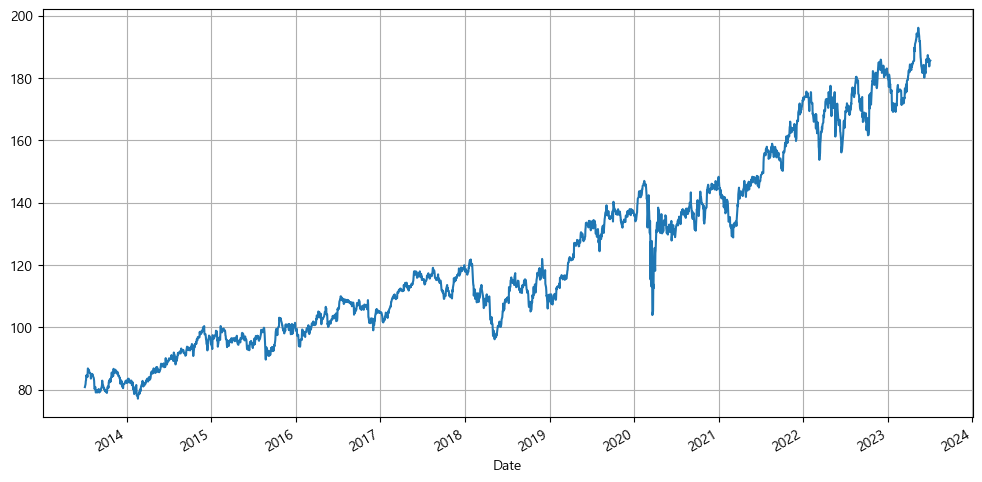

In [3]:
coca['Close'].plot(figsize=(12,6),grid=True)

In [4]:
coca_trunc = coca[:'2023-7-4'] # 2012-7-1 ~ 2022-12-31
coca_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-05,81.099998,81.279999,80.290001,80.800003,60.646851,3343200
2013-07-08,81.320000,81.839996,81.070000,81.779999,61.382404,3749900
2013-07-09,82.209999,82.870003,81.959999,82.769997,62.125473,3834500
2013-07-10,82.769997,83.419998,82.669998,82.989998,62.290611,5654100
2013-07-11,83.650002,84.629997,83.650002,84.550003,63.461514,4746500
...,...,...,...,...,...,...
2023-06-27,184.669998,186.610001,183.960007,186.220001,186.220001,5763000
2023-06-28,186.250000,186.740005,183.380005,183.699997,183.699997,5193900
2023-06-29,183.250000,183.889999,181.389999,183.880005,183.880005,5770400


In [5]:
df = pd.DataFrame({'ds':coca_trunc.index, 'y':coca_trunc['Close']})
df.reset_index(inplace=True)

In [6]:
df

,Date,ds,y
0,2013-07-05,2013-07-05,80.800003
1,2013-07-08,2013-07-08,81.779999
2,2013-07-09,2013-07-09,82.769997
3,2013-07-10,2013-07-10,82.989998
4,2013-07-11,2013-07-11,84.550003
...,...,...,...
2511,2023-06-27,2023-06-27,186.220001
2512,2023-06-28,2023-06-28,183.699997
2513,2023-06-29,2023-06-29,183.880005
2514,2023-06-30,2023-06-30,185.220001


In [7]:
del df['Date']
df

,ds,y
0,2013-07-05,80.800003
1,2013-07-08,81.779999
2,2013-07-09,82.769997
3,2013-07-10,82.989998
4,2013-07-11,84.550003
...,...,...
2511,2023-06-27,186.220001
2512,2023-06-28,183.699997
2513,2023-06-29,183.880005
2514,2023-06-30,185.220001


In [8]:
m = Prophet(daily_seasonality=True)
m.fit(df)

14:04:50 - cmdstanpy - INFO - Chain [1] start processing
14:04:52 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = m.make_future_dataframe(periods=180)
future.tail()

,ds
2691,2023-12-26
2692,2023-12-27
2693,2023-12-28
2694,2023-12-29
2695,2023-12-30


In [10]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2691,2023-12-26,197.567756,191.299802,204.365341
2692,2023-12-27,197.559447,190.616518,203.683983
2693,2023-12-28,197.483566,190.996280,203.799965
2694,2023-12-29,197.529041,190.618625,203.729854
2695,2023-12-30,197.521037,190.553705,203.835220


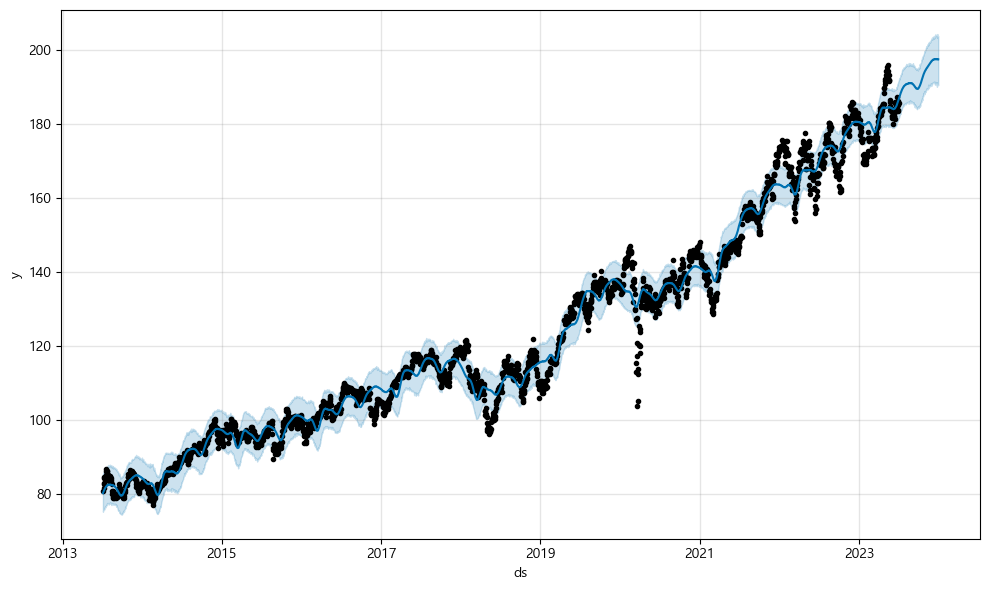

In [11]:
m.plot(forecast);

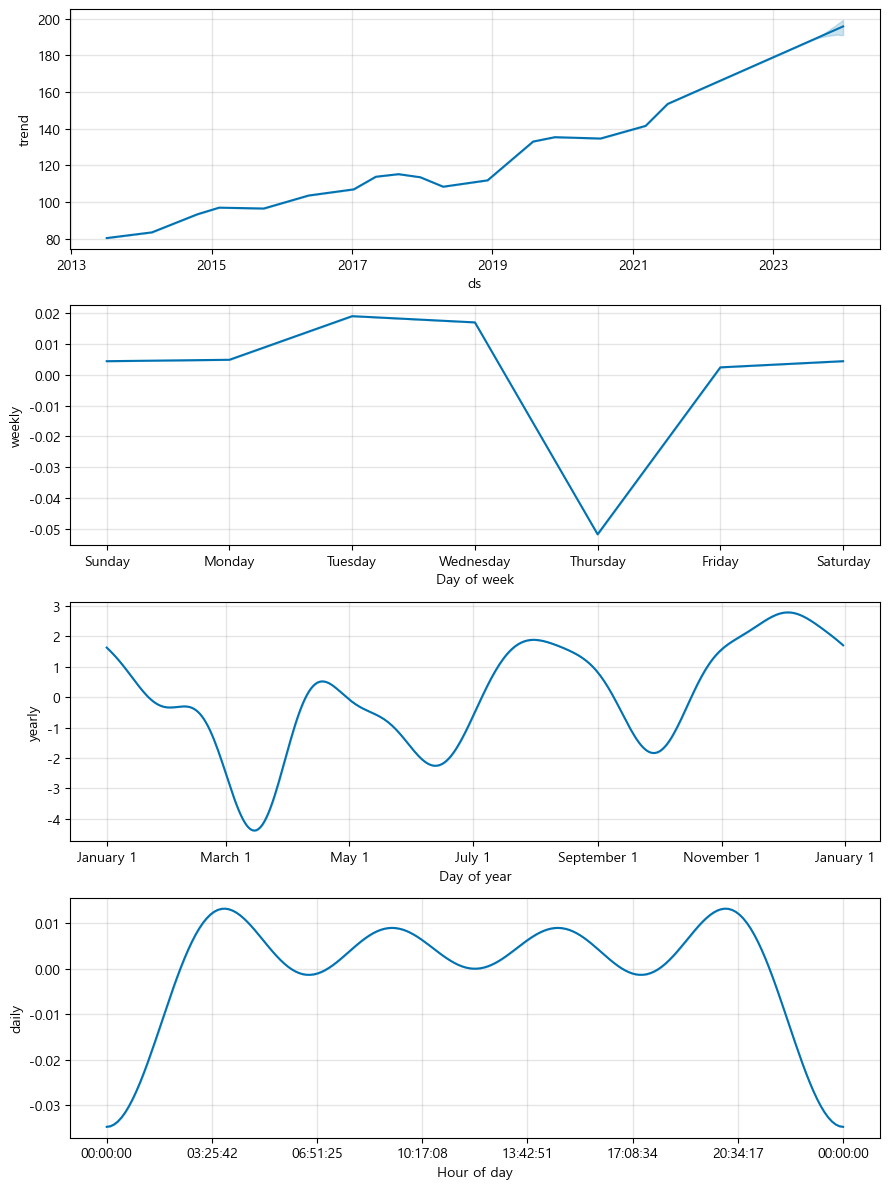

In [12]:
m.plot_components(forecast);

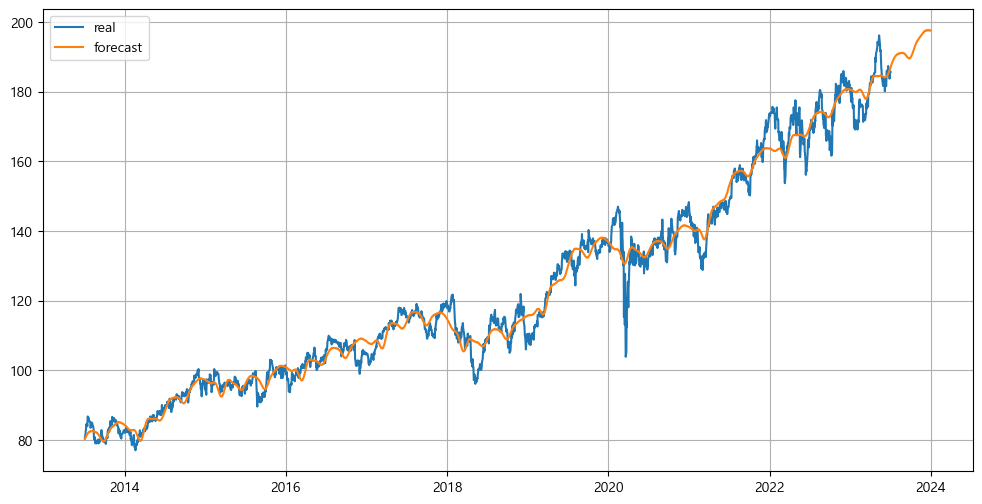

In [13]:
plt.figure(figsize = (12,6))
plt.plot(coca.index,coca['Close'],label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()